Import all the libraries you require in the cell below.



In [ ]:
# Enter your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [ ]:
# A. Read the dataset, explore it and determine what is the dependent variable (1 mark)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
df = pd.read_csv('/content/mushrooms.csv')
print(df)
print("The dependent variable is 'class'.")

# # B. Store the feature and target variable. (2 marks)
feature = df[['cap-shape','cap-surface','cap-color','bruises','odor',
        'gill-attachment','gill-spacing','gill-size','gill-color',
        'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',	
        'stalk-color-above-ring',	'stalk-color-below-ring',	'veil-type','veil-color',	
        'ring-number','ring-type','spore-print-color','population',	'habitat']]
target = df['class'] 

# C. Convert all categorical variables into dummy variables (1 mark)
df = pd.get_dummies(df, columns = ['cap-shape','cap-surface','cap-color','bruises',
                                    'odor','gill-attachment','gill-spacing','gill-size','gill-color',
                                    'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',	
                                    'stalk-color-above-ring',	'stalk-color-below-ring',	'veil-type','veil-color',	
                                    'ring-number','ring-type','spore-print-color','population',	'habitat'])

# D. Partition the data into training and test sets (70/30) (1 mark)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y1)


# E. Fit the training data to a classification tree. (3 marks)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, criterion='entropy', random_state=2020)
dt.fit(X_train, y_train)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
...    ...       ...         ...       ...     ...  ...             ...   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape stalk-root  \
0               c         n          k           e          e   
1               c         b          k           e          c   
...           ...       ...        ...         ...        ...   
8122            c         n          b           t          ?   
8123            c         b          y           e          ?   

     stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                           s                        s                      w

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1263    0]
 [   3 1172]]


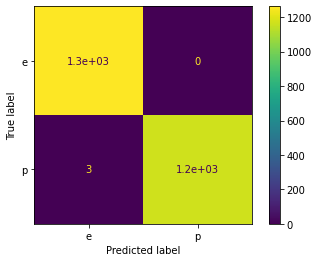

In [ ]:
y_pred = dt.predict(X_test)
from sklearn import metrics
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition?  (2 marks)


In [ ]:
training_pred = dt.predict(X_train)
print('Accuracy =', metrics.accuracy_score(training_pred, y_train))

Accuracy = 1.0


4. Print the accuracy on the test partition? (2 marks)


In [ ]:
print('Accuracy =', metrics.accuracy_score(y_pred,y_test,))

Accuracy = 0.9987694831829368


5. Show the classification tree and save it (5 marks)


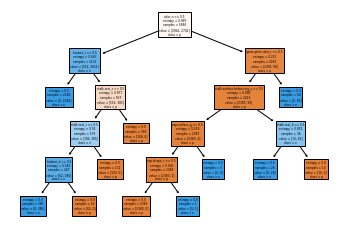

In [ ]:
from sklearn import tree
plt.figure()
fn = X.columns
cn = y.unique()
irisTree = tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.savefig('MushroomDT.png', dpi=150)
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [ ]:
# Enter your code here
imp=pd.DataFrame(zip(X_train.columns, dt.feature_importances_))
pd.set_option('display.max_rows',None)
imp.columns=['Feature', 'Importance']
imp_sorted = imp.sort_values(by=['Importance'], ascending = False)
top3 = imp_sorted.iloc[0:3,:]
print(top3)


         Feature  Importance
27        odor_n    0.527899
21     bruises_t    0.212695
53  stalk-root_c    0.067373


7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
x_new = [[0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]]
ypre = dt.predict(x_new)
print(ypre)
print("The above mushroom is poisonous")

['p']
